In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\SPB_Data\\Artificial neural network\\data mining the water table'

In [3]:
os.path

<module 'ntpath' from 'C:\\Users\\ACER\\Anaconda3\\lib\\ntpath.py'>

In [4]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '0bf8bc6e-30d0-4c50-956a-603fc693d966.csv',
 '4910797b-ee55-40a7-8668-10efd5c1b960.csv',
 '702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv',
 'data mining the water table.png',
 'data mining water table.ipynb',
 'hist results.png',
 'longitude_Latitude_plot',
 'longitude_latitude_plot1',
 'SubmissionFormat.csv']

In [5]:
Affirm = pd.read_csv("0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
train = pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv")
test = pd.read_csv("702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")

In [82]:
Affirm.keys()

Index(['id', 'status_group'], dtype='object')

In [6]:
Affirm.shape, train.shape, test.shape

((59400, 2), (59400, 40), (14850, 40))

In [7]:
Affirm.keys()

Index(['id', 'status_group'], dtype='object')

In [8]:
# check if 'status_group' is in the training set
'status_group' in train.keys()

False

In [9]:
# check if 'id' in Affirm is the same 'id' in training set
np.sum(train['id'] == Affirm['id'])

59400

In [10]:
# since 'id' in Affirm is the same as 'id' in training set, then Affirm is the predicted class of the training
# set, so we can merge them together
train['status_group'] = Affirm['status_group']
train.shape

(59400, 41)

In [11]:
np.sum(train.isnull())

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [63]:
def find_max(name):
    dict_k = {}
    for k in train[str(name)]:
        if k not in dict_k.keys():
            dict_k.setdefault(k, 1)
        else:
            dict_k[k] = dict_k.get(k) + 1

    max_value = max(dict_k.values())
    solution = ()
    for k in dict_k.keys():
        if dict_k[k] == max_value:
            solution = k, max_value
        else:
            pass
    return solution

solution = find_max('funder')
solution

('Government Of Tanzania', 12719)

In [13]:
train['funder'] = train['funder'].fillna(solution[0])

In [14]:
installer_solution = find_max('installer')
train['installer'] = train['installer'].fillna(installer_solution[0])
np.sum(train['installer'].isnull())

0

In [15]:
sub_vil_solution = find_max('subvillage')
train['subvillage'] = train['subvillage'].fillna(sub_vil_solution[0])
np.sum(train['subvillage'].isnull())

0

In [16]:
train = train.drop('scheme_name', axis = 1)

In [17]:
def fix(name):
    check_solution = find_max(name)
    train[name] = train[name].fillna(check_solution[0])
    return np.sum(train[name].isnull())
#train = train.applymap(fix)
#train.info()

In [18]:
public_meet = find_max('public_meeting')
train['public_meeting'] = train['public_meeting'].fillna(public_meet[0])
np.sum(train['public_meeting'].isnull())

0

In [19]:
recorded_solution = find_max('scheme_management')
train['scheme_management'] = train['scheme_management'].fillna(recorded_solution[0])
np.sum(train['scheme_management'].isnull())

0

In [20]:
permit = find_max('permit')
train['permit'] = train['permit'].fillna(permit[0])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null bool
rec

In [21]:
train = train.drop(['date_recorded'], axis = 1)

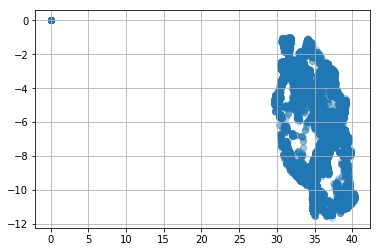

In [22]:
plt.scatter(train['longitude'], train['latitude'], alpha = 0.1)
plt.grid()
plt.show()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.savefig("longitude_Latitude_plot", format = 'png', dpi = 300)

In [23]:
train.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


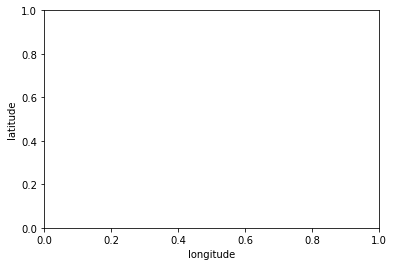

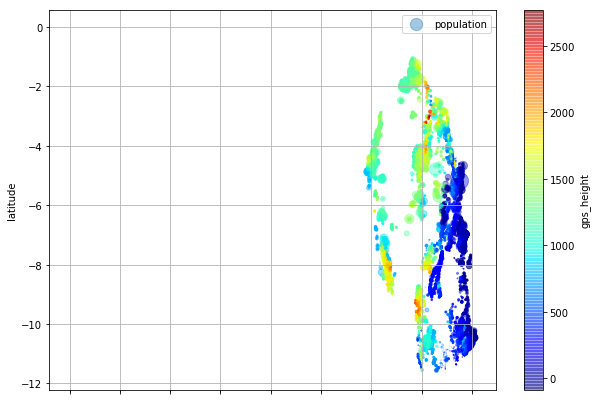

In [24]:
train.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = train['population']/100, label = 'population', c = 'gps_height',
           cmap = plt.get_cmap('jet'),colorbar = True, alpha = 0.4, figsize = (10,7))
plt.grid()
plt.legend()
plt.savefig('longitude_latitude_plot1', format = 'png')
plt.show()


In [25]:
train_file = train.drop(['latitude', 'longitude'], axis = 1)
train_file.head()

,id,amount_tsh,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,none,0,Lake Nyasa,Mnyusi B,Iringa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,Grumeti,1399,GRUMETI,Zahanati,0,Lake Victoria,Nyamara,Mara,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,Lottery Club,686,World vision,Kwa Mahundi,0,Pangani,Majengo,Manyara,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,Unicef,263,UNICEF,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,Action In A,0,Artisan,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [26]:
train_file.keys()

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [27]:
categorical_column = [ 'basin', 'region',
                     'lga', 'scheme_management','extraction_type','extraction_type_group',
                     'extraction_type_class','management','source','source_type', 'source_class',
                     'waterpoint_type', 'waterpoint_type_group']
boolean_column = ['public_meeting','permit']
ordinal_column = ['recorded_by','management_group','payment', 'payment_type','water_quality', 'quality_group',
                 'quantity', 'quantity_group', 'status_group']
drop_column = ['funder', 'installer','wpt_name', 'subvillage','ward']

In [28]:
train_file['public_meeting'] = train_file['public_meeting'][train_file['public_meeting'] == True] = 1
train_file['public_meeting'] = train_file['public_meeting'][train_file['public_meeting'] == False] = 0

train_file['permit'] = train_file['permit'][train_file['permit'] == True] = 1
train_file['permit'] = train_file['permit'][train_file['permit'] == False] = 0

In [29]:
categorical_file = pd.get_dummies(train_file,columns = categorical_column)
categorical_file.shape

(59400, 274)

In [30]:
for key in categorical_column:
    re_count = {}
    re_count = train_file[key].value_counts()
    print (len(re_count.keys()) ,key)
    

9 basin
21 region
125 lga
12 scheme_management
18 extraction_type
13 extraction_type_group
7 extraction_type_class
12 management
10 source
7 source_type
3 source_class
7 waterpoint_type
6 waterpoint_type_group


In [31]:
adjust_ordinal = ordinal_column
categorize = categorical_file.drop(drop_column, axis = 1)

In [32]:
ordinal_dict = {}
for value in adjust_ordinal:
    ordinal_dict = dict(categorize[value].value_counts())
    count = 0
    for k in ordinal_dict.keys():
        ordinal_dict[k] = count
        count += 1
    categorize[value] = categorize[value].map(ordinal_dict)
    
categorize.head()

,id,amount_tsh,gps_height,num_private,region_code,district_code,population,public_meeting,recorded_by,permit,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390,0,11,5,109,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8776,0.0,1399,0,20,2,280,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,34310,25.0,686,0,21,4,250,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,263,0,90,63,58,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,19728,0.0,0,0,18,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
categorize['status_group'].value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

In [34]:
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split

In [35]:
drop_status = categorize.drop(['status_group'], axis = 1)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
drop_pca = pca.fit_transform(drop_status)
drop_pca.shape

(59400, 50)

In [37]:
x = drop_status
y = categorize['status_group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 100)

In [38]:
scale = MinMaxScaler()
std_scale = StandardScaler()
x_train_std = std_scale.fit_transform(x_train)
x_test_std = std_scale.fit_transform(x_test)

x_train_scale = scale.fit_transform(x_train_std)
x_test_scale = scale.fit_transform(x_test_std)

In [39]:
# Applying principal component analysis
cov_train = np.cov(x_train_scale.T)
cov_test = np.cov(x_test_scale.T)

eigen_val_train, eigen_vec_train = np.linalg.eig(cov_train)
eigen_val_test, eigen_vec_test = np.linalg.eig(cov_test)



In [40]:
tot_train = sum(eigen_val_train)
tot_test = sum(eigen_val_test)

var_exp_train = [x/ tot_train for x in sorted(eigen_val_train, reverse = True)]
var_exp_test = [x/tot_test for x in sorted(eigen_val_test, reverse = True)]
max(var_exp_train), max(var_exp_test)

((0.21128579440124964+0j), (0.21163540261285596+0j))

In [41]:
cum_var_exp_train = np.cumsum(var_exp_train)
cum_var_exp_test = np.cumsum(var_exp_test)

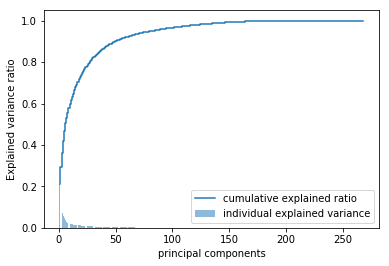

In [42]:
plt.bar([i for i in range(1,269)], var_exp_train, alpha = 0.5, align = 'center', 
       label = 'individual explained variance')
plt.step([i for i in range(1,269)], cum_var_exp_train, where = 'mid', 
        label = 'cumulative explained ratio')
plt.ylabel("Explained variance ratio")
plt.xlabel("principal components")
plt.legend(loc = 'best')
plt.show()

In [43]:
eigen_pairs = [(np.abs(eigen_val_train[i], eigen_vec_train[:,i]) for i in range(len(eigen_val_train)))]
eigen_pairs.sort(reverse = True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
final = np.array([])
for i in range(2,50):
    new = np.hstack((eigen_pairs[0][i][:, np.newaxis], eigen_pairs[1][i][:, np.newaxis]))
    final = np.hstack((w[:, np.newaxis], new[:, np.newaxis]))
np.shape(final)


In [45]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    
    x1_min, x1_max = min(X[:, 0]), max(X[:,0]) + 1
    x2_min, x2_max = min(X[:, 1]), max(X[:,1]) + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    print(xx1.shape, xx2.shape)
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c1, 0], y = X[y == c1, 1], 
                   alpha = 0.8, c = cmap(idx), marker = markers[idx], label = c1)
        


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
lr = LogisticRegression()
x_train_pca = pca.fit_transform(x_train_scale)
x_test_pca = pca.fit_transform(x_test_scale)
lr.fit(x_train_pca, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
plot_decision_regions(x_train_pca, y_train, classifier = lr)
plt.xlabel("PC1")
plt.ylabel('PC2')
plt.legend(loc = 'lower left')
plt.show()

In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
y_train_pred = cross_val_predict(lr, x_train_pca, y_train, cv = 10)
precision = precision_score(y_train, y_train_pred, average = None)
recall = recall_score(y_train, y_train_pred, average = None)
f1 = f1_score(y_train, y_train_pred, average = None)
print (precision, recall, f1)

[ 0.68053821  0.68134986  0.43712575] [ 0.84114871  0.57446809  0.02413223] [ 0.75236742  0.62336066  0.04573935]


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.metrics import classification_report

dtrain_predictions = lr.predict(x_train_pca)
dtrain_predprob = lr.predict_proba(x_train_pca)[:,1]
cv_score = cross_validation.cross_val_score(lr,x_train_pca, y_train, cv=5, scoring='accuracy')
    
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
print (classification_report(y_train, dtrain_predictions))


Model Report
Accuracy : 0.681
CV Score : Mean - 0.6799426 | Std - 0.004541652 | Min - 0.6734399 | Max - 0.68635
             precision    recall  f1-score   support

          0       0.68      0.84      0.75     22669
          1       0.68      0.58      0.63     15886
          2       0.45      0.02      0.05      3025

avg / total       0.67      0.68      0.65     41580



In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(x_train_pca, y_train)
#y_pred = knn.predict(x_test_pca)
#mse = mean_squared_error(y_pred, y_test)
#print (knn.score(x_train_pca, y_train),knn.score(x_test_pca, y_test), mse)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [83]:
for n in [1,2,3,4,5,6,7,8,9,10]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_pca, y_train)
    print (knn.score(x_train_pca, y_train), "       ",knn.score(x_test_pca, y_test), "      ", n)

1.0         0.585129068462        1
0.852693602694         0.631200897868        2
0.845646945647         0.623344556678        3
0.819264069264         0.63771043771        4
0.811207311207         0.637991021324        5
0.799975949976         0.644893378227        6
0.795238095238         0.642424242424        7
0.788985088985         0.649382716049        8
0.785618085618         0.648765432099        9
0.780158730159         0.651851851852        10


In [84]:
for C in [0.0001,0.001,0.01,0.1,1,1.0,10,100]:
    lr = LogisticRegression(C = C)
    lr.fit(x_train_pca, y_train)
    print (lr.score(x_train_pca, y_train), "     ", lr.score(x_test_pca, y_test), "     ", C)

0.644805194805       0.64214365881       0.0001
0.658658008658       0.654601571268       0.001
0.679918229918       0.66531986532       0.01
0.680832130832       0.664141414141       0.1
0.680663780664       0.663692480359       1
0.680663780664       0.663692480359       1.0
0.680808080808       0.663636363636       10
0.680808080808       0.663636363636       100


In [93]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha = 0.0010, n_iter = 10)
sgd.fit(x_train_pca, y_train)
sgd.score(x_train_pca, y_train),sgd.score(x_test_pca, y_test)
y_pred = sgd.predict(x_test_pca)
mse = mean_squared_error(y_pred, y_test)
print (mse ,accuracy_score(y_test, y_pred))

0.50241301908 0.665432098765


In [94]:
for i in [0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    for k in [3,5,10,20]:
        sgd = SGDClassifier(alpha = i, n_iter = k, penalty = 'L1')
        sgd.fit(x_train_scale, y_train)
        y_pred = sgd.predict(x_test_scale)
        mse = mean_squared_error(y_pred, y_test)
        print (i, k, mse ,accuracy_score(y_test, y_pred))

1e-05 3 0.813075196409 0.594332210999
1e-05 5 0.582210998878 0.627384960718
1e-05 10 0.539169472503 0.660830527497
1e-05 20 0.434848484848 0.699494949495
0.0001 3 0.496857463524 0.690347923681
0.0001 5 0.446857463524 0.705836139169
0.0001 10 0.465095398429 0.705611672278
0.0001 20 0.457912457912 0.706060606061
0.001 3 0.462738496072 0.698709315376
0.001 5 0.474354657688 0.695847362514
0.001 10 0.465207631874 0.698765432099
0.001 20 0.482828282828 0.693434343434
0.01 3 0.566947250281 0.631369248036
0.01 5 0.564197530864 0.633782267116
0.01 10 0.564029180696 0.634455667789
0.01 20 0.564365881033 0.633613916947
0.1 3 0.679349046016 0.538159371493
0.1 5 0.679349046016 0.538159371493
0.1 10 0.679349046016 0.538159371493
0.1 20 0.679349046016 0.538159371493
1 3 0.679349046016 0.538159371493
1 5 0.679349046016 0.538159371493
1 10 0.679349046016 0.538159371493
1 20 0.679349046016 0.538159371493
10 3 0.679349046016 0.538159371493
10 5 0.679349046016 0.538159371493
10 10 0.679349046016 0.5381593

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.metrics import classification_report

gbrt = GradientBoostingClassifier(random_state = 32)
def modelfit(alg, x, y_train, performCV=True, printFeatureImportance=False, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(x, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(x)
    dtrain_predprob = alg.predict_proba(x)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,x, y_train, cv=cv_folds, scoring='accuracy')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        print (classification_report(y_train, dtrain_predictions))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_,y_train).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()
modelfit(gbrt, x_train_pca, y_train)


Model Report
Accuracy : 0.7566
CV Score : Mean - 0.7516114 | Std - 0.001944493 | Min - 0.7489177 | Max - 0.7539683
             precision    recall  f1-score   support

          0       0.73      0.93      0.81     22669
          1       0.84      0.63      0.72     15886
          2       0.68      0.12      0.21      3025

avg / total       0.76      0.76      0.73     41580



In [64]:
test['funder'] = test['funder'].fillna(solution[0])

In [65]:
installer_solution = find_max('installer')
test['installer'] =test['installer'].fillna(installer_solution[0])
np.sum(test['installer'].isnull())

0

In [66]:
sub_vil_solution = find_max('subvillage')
test['subvillage'] = test['subvillage'].fillna(sub_vil_solution[0])
np.sum(test['subvillage'].isnull())

0

In [67]:
test = test.drop('scheme_name', axis = 1)

In [68]:
public_meet = find_max('public_meeting')
test['public_meeting'] = test['public_meeting'].fillna(public_meet[0])
np.sum(test['public_meeting'].isnull())

0

In [69]:
recorded_solution = find_max('scheme_management')
test['scheme_management'] = test['scheme_management'].fillna(recorded_solution[0])
np.sum(test['scheme_management'].isnull())

0

In [70]:
permit = find_max('permit')
test['permit'] = test['permit'].fillna(permit[0])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 39 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
date_recorded            14850 non-null object
funder                   14850 non-null object
gps_height               14850 non-null int64
installer                14850 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
num_private              14850 non-null int64
basin                    14850 non-null object
subvillage               14850 non-null object
region                   14850 non-null object
region_code              14850 non-null int64
district_code            14850 non-null int64
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14850 non-null bool
rec

In [71]:
test = test.drop(['date_recorded'], axis = 1)

In [72]:
test_file = test.drop(['latitude', 'longitude'], axis = 1)
test_file.head()

,id,amount_tsh,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,Dmdd,1996,DMDD,Dinamu Secondary School,0,Internal,Magoma,Manyara,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,Government Of Tanzania,1569,DWE,Kimnyak,0,Pangani,Kimnyak,Arusha,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,Government Of Tanzania,1567,DWE,Puma Secondary,0,Internal,Msatu,Singida,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,Finn Water,267,FINN WATER,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,Bruder,1260,BRUDER,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [73]:
test_file['public_meeting'] = test_file['public_meeting'][test_file['public_meeting'] == True] = 1
test_file['public_meeting'] = test_file['public_meeting'][test_file['public_meeting'] == False] = 0

test_file['permit'] = test_file['permit'][test_file['permit'] == True] = 1
test_file['permit'] = test_file['permit'][test_file['permit'] == False] = 0

In [74]:
categorical_file = pd.get_dummies(test_file,columns = categorical_column)
categorical_file.shape

(14850, 271)

In [75]:
adjust_ordinal = ordinal_column.remove('status_group')
categorize = categorical_file.drop(drop_column, axis = 1)

In [76]:
ordinal_dict = {}
for value in ordinal_column:
    ordinal_dict = dict(categorize[value].value_counts())
    count = 0
    for k in ordinal_dict.keys():
        ordinal_dict[k] = count
        count += 1
    categorize[value] = categorize[value].map(ordinal_dict)
    
categorize.head()

,id,amount_tsh,gps_height,num_private,region_code,district_code,population,public_meeting,recorded_by,permit,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,50785,0.0,1996,0,21,3,321,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,51630,0.0,1569,0,2,2,300,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,17168,0.0,1567,0,13,2,500,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,45559,0.0,267,0,80,43,250,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,49871,500.0,1260,0,10,3,60,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
scale = MinMaxScaler()
std_scale = StandardScaler()
categorize_std = std_scale.fit_transform(categorize)

categorize_scale = scale.fit_transform(categorize_std)

In [78]:
categorize_scale_pca = pca.fit_transform(categorize_scale)
np.shape(categorize_scale_pca)

(14850, 50)

In [81]:
lr_predict = lr.predict(categorize_scale_pca)
knn_predict = knn.predict(categorize_scale_pca)

In [ ]:
help (pd.DataFrame)

In [95]:
submit_frame = {}
submit_frame['id'] = test['id']
submit_frame['status_group'] = lr_predict

submit_frame = pd.DataFrame(submit_frame, dtype = None)
submit_frame.get('dtype')

In [ ]:
help (submit_frame.to_csv)

In [96]:
submit_frame.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\data mining the water table submission\lr_first_this.csv", index = False)

In [97]:
#Choose all predictors except target & IDcols

predictors = [x for x in train.columns if x not in ['id']]
param_test1 = {'n_estimators':[350,400]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=32), 
param_grid = param_test1, scoring='accuracy', cv=5)
gsearch1.fit(x_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=32,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [350, 400]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [113]:
gsearch1.grid_scores_

[mean: 0.76659, std: 0.00093, params: {'n_estimators': 350},
 mean: 0.76712, std: 0.00157, params: {'n_estimators': 400}]

In [114]:
gsearch1.best_params_

{'n_estimators': 400}

In [115]:
gsearch1.best_score_

0.7671236171236171

In [ ]:
param_test2 = {'max_depth':[14, 16,18,20,22], 'min_samples_split':[200,300,400,500,600,700,800,900,1000]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=400, max_features='sqrt', subsample=0.8, random_state=32),
                        param_grid = param_test2, scoring='accuracy', cv=5)
gsearch2.fit(x_train_pca,y_train)
gsearch2.grid_scores_

In [ ]:
gsearch2.best_params_

In [ ]:
gsearch2.best_score_